# Richardson-Lucy-Deconvolution on OpenCL-compatible GPUs
[Richardson-Lucy-Deconvolution](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution) is a common and yet basic algorithm for image deconvolution in microscopy. In this notebook we will use a GPU-accelerated version of it that is implemented in the napari-plugin [RedLionFish](https://github.com/rosalindfranklininstitute/RedLionfish). Hence, you can use the same algorithm from the graphical user interface in napari.

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import RedLionfishDeconv as rl
import matplotlib.pyplot as plt

We will load an image showing fluorescent intensity along lines. This 3D image was taken with a confocal microscope.

In [2]:
image = imread('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif')
image.shape

(21, 150, 150)

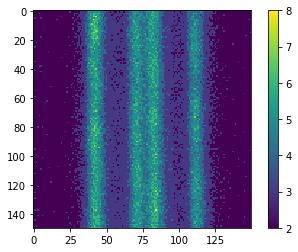

In [3]:
imshow(image, colorbar=True)

The following PSF image was extracted from images taken with the same microscope using the procedure [explained before](deconvolution:extract_psf).

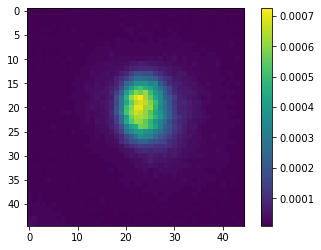

In [4]:
psf = imread('../../data/psf.tif')

imshow(psf, colorbar=True)

We can now deconvolve the image using RedLionFish's Richardson-Lucy-Deconvolution algorithm. We should specify that the algorith shall be executed on the `gpu`.

ERROR:root:Failed to setup Reikna with OpenCL.
ERROR:root:No module named 'reikna'


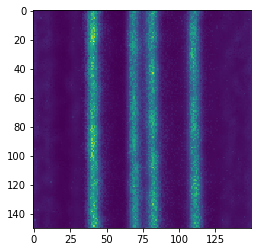

In [5]:
iterations = 50

deconvolved = rl.doRLDeconvolutionFromNpArrays(image, 
                                               psf, 
                                               niter=iterations, 
                                               method='gpu', 
                                               resAsUint8=False )
imshow(deconvolved)

To visualize more precisely how the original image and the deconvolved version differ, we can plot the intensity along a line from the left to the right. We retrieve these numbers from a maximum intensity projection along Z.

In [6]:
max_intensity_image = image.max(axis=0)
max_intensity_image.shape

(150, 150)

In [7]:
max_intensity_deconvolved = deconvolved.max(axis=0)
max_intensity_deconvolved.shape

(150, 150)

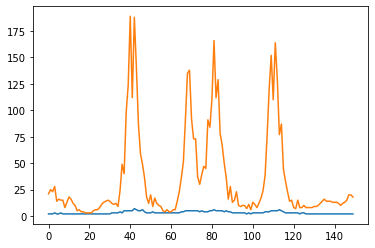

In [8]:
plt.plot(max_intensity_image[80])
plt.plot(max_intensity_deconvolved[80])
plt.show()

As you can see, the intensity range has change through deconvolution. This depends on the algorithm and implementation. Whenever applying deconvolution, consider checking if the total intensity in the original image and the deconvolved image are within the same range:

In [9]:
image.min(), image.max()

(1, 8)

In [10]:
deconvolved.min(), deconvolved.max()

(0, 255)

If these ranges differ, you should correct for it, e.g. for visualization. Note: Further analysis of the resulting intensity values must be done with care, as we cannot be sure about the actual intensity range of the deconvolution result.

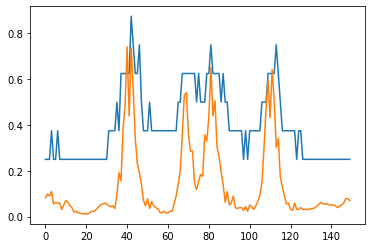

In [11]:
plt.plot(max_intensity_image[80] / max_intensity_image.max())
plt.plot(max_intensity_deconvolved[80] / max_intensity_deconvolved.max())
plt.show()